In [1]:
from os import stat_result

import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
import sys

import statsmodels.api as sm

from Fluery import fleury
from Hierholzer import hierholzer

In [2]:
def execute_with_timer(func, timer):
    start = time.time()
    
    func()
    
    end = time.time()
    
    delta = end - start
    
    if delta > timer:
        return -1
    
    return delta

def make_random_graph(tam):
    
    if tam % 2 == 0:
        tam = tam + 1
        
    adjacencias = {i: [] for i in range(tam)}

    for i in range(tam):
        if i == 0:
            adjacencias[i].extend([1, 2])
        elif i == 1:
            adjacencias[i].extend([0, 2])
        elif i == tam - 2:
            adjacencias[i].extend([i - 1, i + 1])
        elif i == tam - 1:
            adjacencias[i].extend([i - 1, i - 2])
        else:
            if i % 2 == 0:
                adjacencias[i].extend([i - 2, i - 1, i + 1, i + 2])
            else:
                adjacencias[i].extend([i - 1, i + 1])

    return adjacencias

def teste_alg(alg, timer):
    input_size = 2
    last_time: float = None
    execution_times = []
    input_sizes = []
    
    while last_time == None or last_time != -1:
        graph = make_random_graph(input_size)
     
        func = lambda: alg(graph, 0)
        
        alg_execution_time = execute_with_timer(func, timer)
        
        if alg_execution_time != -1:
            execution_times.append(alg_execution_time)
            input_sizes.append(input_size)
            print(f"Input size: {input_size}, execution time: {alg_execution_time:.6f} segundos")
        
        last_time = alg_execution_time
            
        input_size *= 2
    
    return input_sizes, execution_times

In [3]:
# plota o gráfico dos pontos
def plot_graph(input_sizes:list[int], execution_times:list[float], alg_name:str):
    lx = np.log2(np.array(input_sizes))
    ly = np.log2(np.array(execution_times))

    plt.scatter(lx,ly)
    plt.plot(lx, ly)

    slope = math.log2(execution_times[-1]/execution_times[-2])/math.log2(input_sizes[-1]/input_sizes[-2])
    print(f"slope: {slope}")

    plt.title(f'{alg_name} - slope: {slope}')
    plt.xlabel('log2 N')
    plt.ylabel('log2 T(N)')
    plt.savefig("graph_"+alg_name+'.png')
    plt.show()
    plt.close()

In [8]:
    sys.setrecursionlimit(100000)
    
    fle_sizes, fle_times = teste_alg(fleury, 20)

slope: 2.503581645260452


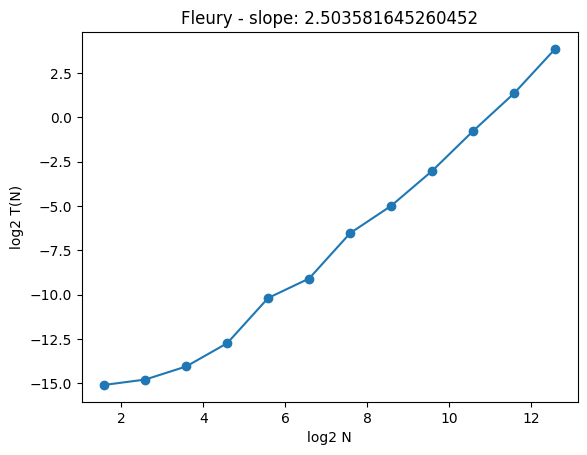

In [10]:
    plot_graph( fle_sizes, fle_times, "Fleury")

In [35]:
    lx = np.log2(np.array(fle_sizes))
    ly = np.log2(np.array(fle_times))
    
    lx = sm.add_constant(lx)
    res = sm.OLS(ly, lx).fit()
    
    print(f"intervalo:  {res.conf_int(0.00005)[1, 0]:.10f},  {res.conf_int(0.00005)[1, 1]:.10f}")

intervalo:  0.0000000000,  0.0000000000


In [ ]:
    h_sizes, h_times = teste_alg(hierholzer, 20)

Input size: 2, execution time: 0.000011 segundos
Input size: 4, execution time: 0.000006 segundos
Input size: 8, execution time: 0.000007 segundos
Input size: 16, execution time: 0.000011 segundos
Input size: 32, execution time: 0.000020 segundos
Input size: 64, execution time: 0.000037 segundos
Input size: 128, execution time: 0.000069 segundos
Input size: 256, execution time: 0.000132 segundos
Input size: 512, execution time: 0.000324 segundos
Input size: 1024, execution time: 0.000670 segundos
Input size: 2048, execution time: 0.001350 segundos
Input size: 4096, execution time: 0.001636 segundos
Input size: 8192, execution time: 0.003591 segundos
Input size: 16384, execution time: 0.006697 segundos
Input size: 32768, execution time: 0.014356 segundos
Input size: 65536, execution time: 0.025622 segundos
Input size: 131072, execution time: 0.053228 segundos
Input size: 262144, execution time: 0.108720 segundos
Input size: 524288, execution time: 0.214430 segundos
Input size: 1048576, 

slope: 1.0110499375627215


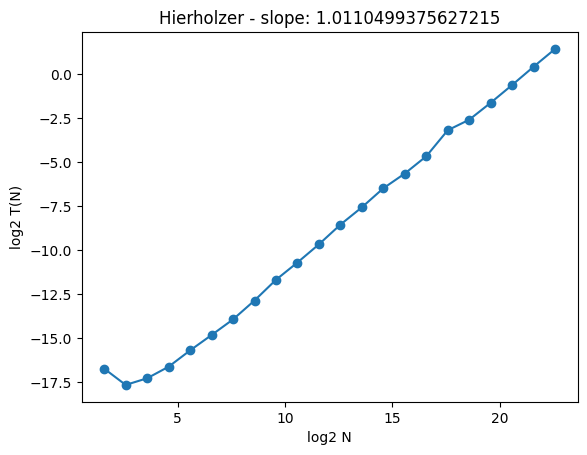

In [6]:
    plot_graph( h_sizes, h_times, "Hierholzer")